In [14]:
from enum import Enum
from math import sin, cos
import matplotlib.pyplot as plt
import numpy as np

In [9]:
class Function:

    def __init__(self):

        self.left = -1.8
        self.right = 0.2

    def __call__(self, x):
        return x ** 2 - 10 * (sin(x) ** 15)
    
    def derivative(self, x):
        return 2 * x - 150 * cos(x) * (sin(x) ** 14)

In [10]:
f = Function()

In [11]:
def plot_function(func, range_a, range_b, title, color):
    
    func_x = np.linspace(range_a, range_b, 10000)
        
    func_y = list(map(func, func_x))

    plt.plot(func_x, func_y, label = title, color = color)

    plt.legend()
    plt.grid(True)
    plt.savefig("zadana_funkcja.png")

Wykres zadanej funkcji f

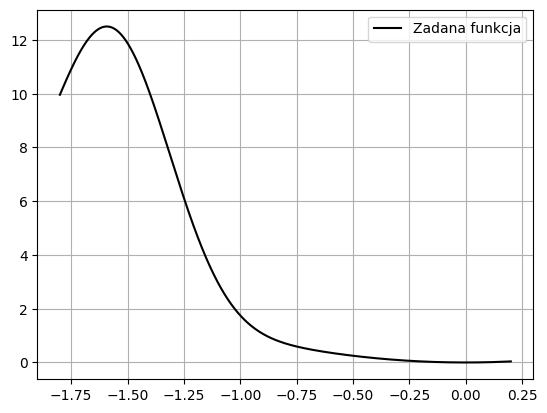

In [12]:
plot_function(f, f.left, f.right, "Zadana funkcja", "black") # Może wyprowadzić poza przedział

Wykres pochodnej zadanej funkcji f

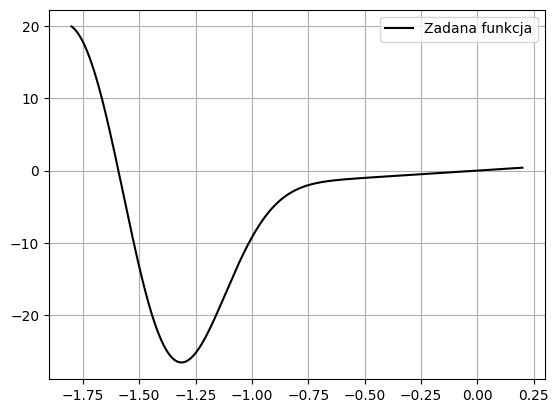

In [15]:
plot_function(f.derivative, f.left, f.right, "Zadana funkcja", "black") # Może wyprowadzić poza przedział

Znajdowanie miejsc zerowych funkcji nieliniowych metodą siecznych

![title](img_vsc/img01.png)

In [16]:
# Kryteria przyrostowe
# Stopping conditions for secant_method
class ConditionSecant(Enum):
    ABS = lambda y_i, eps : abs(y_i) < eps
    DISTANCE = lambda x_1, x_2, eps: abs(x_1 - x_2) < eps

In [18]:
def secant_method(f, x_0, x_1, condition, eps, max_iterations):
    
    x_i = x_0
    x_j = x_1 # x_j = x_(i + 1)
    
    for _ in range(max_iterations):
        
        if f(x_i) == f(x_j): # Division by zero, thus no solution
            return None
        
        x_i, x_j = x_j, x_j - ( (x_j - x_i) / (f(x_j) - f(x_i)) ) * f(x_j)
        
        if condition == ConditionSecant.ABS and ConditionSecant.ABS(f(x_j), eps):
            return x_j
        elif condition == ConditionSecant.DISTANCE and ConditionSecant.DISTANCE(x_i, x_j, eps):
            return x_j
    
    print("Exceeded max number of iterations")
    return None # Exceeded number of iterations

Przykładowe użycie

In [20]:
print(secant_method(f = f, x_0 = -0.5, x_1 = f.right, condition = ConditionSecant.ABS, eps = 1e-18, max_iterations = 1000))

9.915028892089407e-10


Znajdowanie miejsc zerowych funkcji nieliniowych metodą Newtona-Raphsona

![title](img_vsc/img02.png)

In [21]:
# Stopping conditions for newton_raphson_method
class ConditionNewton(Enum):
    ABS = lambda y_i, eps : abs(y_i) < eps
    DISTANCE = lambda y_i, yd_i, eps: abs(y_i / yd_i) < eps

In [22]:
def newton_raphson_method(f, x_0, condition, eps, max_iterations):
    
    x_i = x_0
    
    for _ in range(max_iterations):
        
        y_i = f(x_i)
        yd_i = f.derivative(x_i)
        
        if yd_i == 0: # Derivative equal to zero
            return None
        
        if condition == ConditionNewton.ABS and ConditionNewton.ABS(f(y_i), eps):
            return x_i
        elif condition == ConditionNewton.DISTANCE and ConditionNewton.DISTANCE(y_i, yd_i, eps):
            return x_i
        
        x_i  -= y_i / yd_i        
        
    return None # Max iterations exceeded

Przykładowe użycie

In [23]:
print(newton_raphson_method(f = f, x_0 = 0.01, condition = ConditionNewton.DISTANCE, eps = 1e-18, max_iterations = 1000))

1.1102230246251566e-18


In [ ]:
class TestSecantMethod():

    def __init__(self):

        self.eps_gen = (1 ** -i for i in range(0, -50, -1))